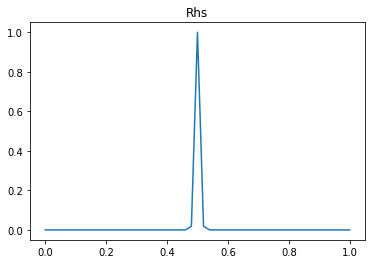

/home/marco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


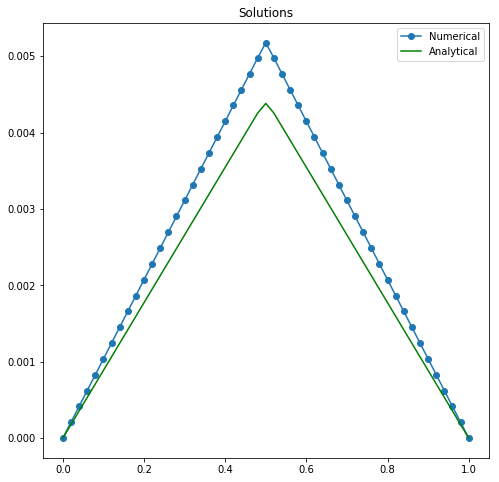

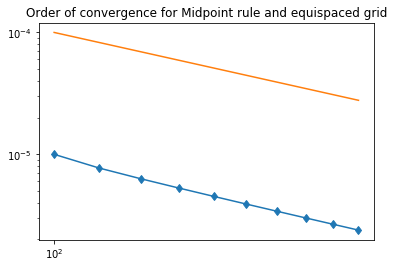

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import interpolate
from scipy.special import erf
from math import pi


def rhs1(x):
    return np.sin(pi*x)

def rhs2(x):
    return np.exp(-1e4*(x-0.5)**2)
    
def rhs3(x):
    return np.cos(2*pi*x)

def rhs4(x):
    return np.exp(-100*np.abs(x-0.5)**2)

    
def uex(x,rhs):
    if (rhs == rhs1):
        return np.sin(pi*x)/(pi**2)
    elif rhs == rhs2:
        return 1/20000*(100*np.sqrt(pi)*x*erf(50-100*x)+50*np.sqrt(pi)*erf(50*(2*x-1)) + 50*np.sqrt(pi)*erf(50) - 1/np.exp(2500*(1-2*x)**2) + 1/np.exp(2500))
    elif rhs == rhs3:
        return -(np.sin(pi*x)**2)/(2*pi**2)
    elif rhs == rhs4:
        return 1/200*(5*np.sqrt(pi)*(2*x-1)*erf(5-10*x) + 5*np.sqrt(pi)*erf(5)-1/np.exp(25*(1-2*x)**2) + 1/np.exp(25))
    
def convergence_plot_equispaced(mrange,quadrature,rhs):
    err = []
    for M in mrange:
        x = np.linspace(0,1,M+1)
        h = 1/M
        b = load_vector(M,rhs,x,quadrature)
        A = -np.diag(np.ones(M-2),-1) + 2*np.diag(np.ones(M-1)) - np.diag(np.ones(M-2),+1)
        A = A/h**2 #stiffness matrix
        u_int = np.linalg.solve(A,b)
        err.append(np.linalg.norm(u_int-uex(x[1:-1],rhs),np.Inf) )
    plt.figure()
    plt.loglog(mrange,err,'-d',mrange,1/mrange**2)
    plt.title('Order of convergence for ' +str(quadrature) +str(' rule and ') +str('equispaced grid'))
    plt.show()


def load_vector(M,rhs,x,quadrature):
    h = 1/M
    b = []
    if quadrature == 'Gaussian':
        for i in range(1,M):
            b.append(integrate.quad(lambda y: (1/h**2)*(y-x[i-1])*rhs(y),x[i-1],x[i])[0] + integrate.quad(lambda y: (1/h**2)*(x[i+1]-y)*rhs(y),x[i],x[i+1])[0])
    elif quadrature == 'Midpoint':
        b=rhs(x[1:-1])
    return b

######### CHOOSE RHS #########
rhs = rhs2
###########################

M = 50
h = 1/M
x = np.linspace(0,1,M+1)
A = -np.diag(np.ones(M-2),-1) + 2*np.diag(np.ones(M-1)) - np.diag(np.ones(M-2),+1)
A = A/h**2 #stiffness matrix
quad = 'Midpoint' #Gaussian or Midpoint
b = load_vector(M,rhs,x,quad)
#print(b)
u_int = np.linalg.solve(A,b)
U = np.zeros(M+1)
U[0] = 0
U[M] = 0
U[1:M] = u_int

plt.figure()
plt.plot(x,rhs(x),'-')
plt.title('Rhs')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(x,U,'-o',label='Numerical')
plt.plot(x,uex(x,rhs),'g',label = 'Analytical')
plt.title('Solutions')
plt.legend()

mrange = np.arange(100,200,10)
convergence_plot_equispaced(mrange,quad,rhs)


In [28]:
print(u_int - uex(x[1:-1],rhs))

[3.00809155e-05 6.01618310e-05 9.02427464e-05 1.20323662e-04
 1.50404577e-04 1.80485493e-04 2.10566408e-04 2.40647324e-04
 2.70728239e-04 3.00809155e-04 3.30890070e-04 3.60970986e-04
 3.91051901e-04 4.21132817e-04 4.51213732e-04 4.81294648e-04
 5.11375563e-04 5.41456479e-04 5.71537394e-04 6.01618310e-04
 6.31699225e-04 6.61780141e-04 6.91861056e-04 7.22028601e-04
 7.94696541e-04 7.22028601e-04 6.91861056e-04 6.61780141e-04
 6.31699225e-04 6.01618310e-04 5.71537394e-04 5.41456479e-04
 5.11375563e-04 4.81294648e-04 4.51213732e-04 4.21132817e-04
 3.91051901e-04 3.60970986e-04 3.30890070e-04 3.00809155e-04
 2.70728239e-04 2.40647324e-04 2.10566408e-04 1.80485493e-04
 1.50404577e-04 1.20323662e-04 9.02427464e-05 6.01618310e-05
 3.00809155e-05]


/home/marco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


Non-equidistant points

/home/marco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


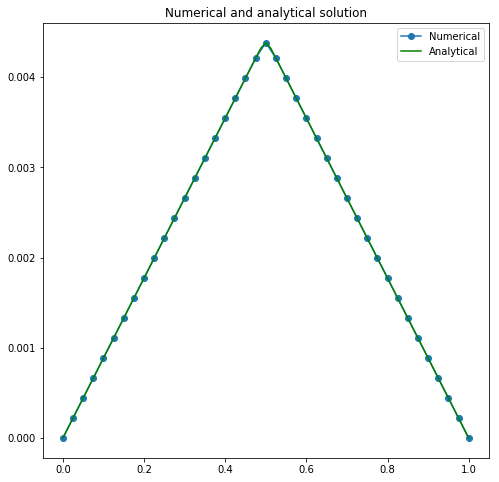

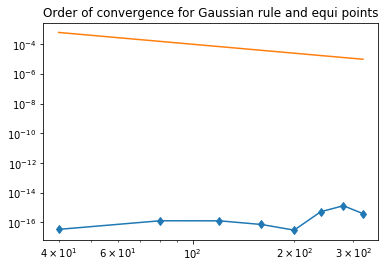

In [47]:
def convergence_plot_noneq(mrange,quadrature,nodetype,rhs):
    err = []
    for M in mrange:
        x = nodegen(M,nodetype)
        u = Fem1dPoisson(M,x,rhs,quadr)
        err.append(np.linalg.norm(u-uex(x,rhs),np.Inf) )
    plt.figure()
    plt.loglog(mrange,err,'-d',mrange,1/mrange**2)
    plt.title('Order of convergence for ' +str(quadrature) + str(' rule and ') + str(nodetype)+ ' points') 
    plt.show()



def nodegen(M,nodtype):
    if nodtype == 'para':
        x = np.zeros(M+1)
        for i in range(0,M+1):
            # parabolic distribution of nodes
            x[i] =((i)/(M))**2
    elif nodtype == 'refine':
        M1 = np.int(np.floor((M)/4))
        M2 = np.int(np.floor((M)/2))
        M3 = np.int(np.floor((M)/4))

        x1 = np.linspace(0,0.45,M1)
        x2 = np.linspace(0.45 + 1/M,0.55,M2)
        x3 = np.linspace(0.55 + 1/M,1,M3+1)
        x = np.concatenate((x1,x2,x3))
    elif nodetype == 'equi':
        x = np.linspace(0,1,M+1)
    return x



def stiffassembly(M,x):
    #x = nodegen(M,nodtype) #x_0,...,x_M (M+1)
    diag = np.zeros(M-1) #x_1,...,x_M-1 (M-1)
    subd = np.zeros(M-2) 
    supr = np.zeros(M-2)
    h = np.diff(x)
    for i in range(1,M):
        diag[i-1] = 1/h[i-1] +1/h[i]

    for k in range(1,M-1):
        supr[k-1] = -1/h[k]
        subd[k-1] = -1/h[k]

    A = np.diag(subd,-1) + np.diag(diag,0) + np.diag(supr,+1)
    return A


#load vector building
def load_vector_noneq(M,rhs,x,quadrature):
    h = np.diff(x)
    b = []
    if quadrature == 'Gaussian':
        for i in range(1,M):
            b.append(integrate.quad(lambda y: (y-x[i-1])/(h[i-1])*rhs(y),x[i-1],x[i])[0] + integrate.quad(lambda y: (x[i+1]-y)/(h[i])*rhs(y),x[i],x[i+1])[0])
    elif quadrature == 'Midpoint':
        for i in range(1,M):
            b.append(rhs(x[i])*(h[i-1] + h[i])/2) #O(h^2)
    
    return b



def Fem1dPoisson(M,x,rhs,quadr):
    A = stiffassembly(M,x)
    b = load_vector_noneq(M,rhs,x,quadr)
    u_int = np.linalg.solve(A,b)
    U = np.zeros(M+1)
    U[0] = 0
    U[1:M] = u_int
    U[M] = 0
    
    return U


######### COMPUTE THE SOLUTION
    
M = 40
nodetype = 'equi' #refine, para (parabolic), equi (equispaced)
x= nodegen(M,nodetype)
quadr = 'Gaussian'
U = Fem1dPoisson(M,x,rhs,quadr)


x = nodegen(M,nodetype)
plt.figure(figsize=(8,8))
plt.plot(x,U,'-o',label='Numerical')
xx = np.linspace(0,1,2*M+1) #to show anayltical solution
plt.plot(xx,uex(xx,rhs),'g',label = 'Analytical')
plt.legend()
plt.title('Numerical and analytical solution')
plt.show()

mrange = np.array([40,80,120,160,200,240,280,320])
convergence_plot_noneq(mrange,quadr,nodetype,rhs)

In [46]:
print(uex(x,rhs)-U) #I'm exact if I use Gaussian quadrature

[ 0.00000000e+00  1.23666810e-19 -2.16840434e-19  4.06575815e-19
  5.55653613e-19  2.98155597e-19  9.21571847e-19  1.08420217e-18
  1.35525272e-18  1.24683250e-18  1.19262239e-18  2.05998413e-18
  2.05998413e-18  1.73472348e-18  1.95156391e-18  2.38524478e-18
  2.60208521e-18  2.60208521e-18  2.81892565e-18  3.03576608e-18
  3.03576608e-18  2.60208521e-18  2.60208521e-18  1.30104261e-18
  4.33680869e-19 -4.33680869e-19  4.33680869e-19  1.73472348e-18
  1.73472348e-18  8.67361738e-19 -4.33680869e-19 -8.67361738e-19
 -2.16840434e-18 -2.60208521e-18 -3.03576608e-18 -2.16840434e-18
 -3.25260652e-18 -1.08420217e-18 -9.75781955e-19 -1.08420217e-19
  0.00000000e+00]


/home/marco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


In [39]:
quadr = 'Midpoint'


M = 10
x = np.linspace(0,1,M+1)
while (M<25):
    
    rho = np.zeros(M)
    for k in range(0,M):
        h = x[k+1] - x[k]
        a = rhs(x[k])
        b = rhs(x[k+1])
        t = 0.5*h*(a**2 + b**2)
        rho[k] = t*h**2
        
    alfa = 0.9
    for i in range(len(rho)):
        if rho[i]>alfa*np.max(rho):
            x = np.append(x,(x[i+1]+x[i])/2)
    
    x = np.sort(x)
    M = len(x) - 1

U = Fem1dPoisson(M,x,rhs,quadr)

/home/marco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


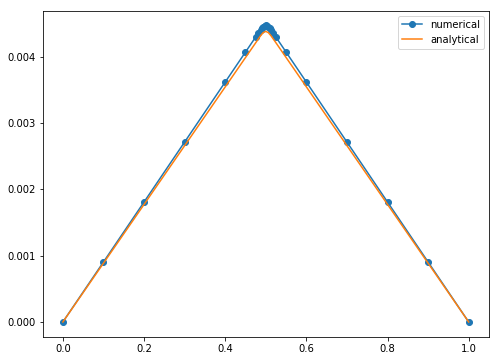

In [40]:
plt.figure(figsize=(8,6))
plt.plot(x,U,'-o',label='numerical')
plt.plot(xx,uex(xx,rhs),'-',label='analytical')
plt.legend()
plt.show()